# Introduction

This notebook is an implementation of Jón Daníelsson's _Financial Risk Forecasting_ (Wiley, 2011) in R 4.2.0, with annotations and introductory examples. The introductory examples (Appendix) are similar to Appendix B in the original book.

Bullet point numbers correspond to the R/MATLAB Listing numbers in the original book, referred to henceforth as _FRF_.

More details can be found at the book website: https://www.financialriskforecasting.com/

Last updated: June 2022

Copyright 2011- 2020 Jón Daníelsson. This code is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This code is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. The GNU General Public License is available at: https://www.gnu.org/licenses/.

<a id='top'></a>
## Table of Contents 
[Chapter 0. Appendix - Introduction](#0) <br>
[Chapter 1. Financial Markets, Prices and Risk](#1) <br>
[Chapter 2. Univariate Volatility Modeling](#2) <br>
[Chapter 3. Multivariate Volatility Models](#3) <br>
[Chapter 4. Risk Measures](#4) <br>
[Chapter 5. Implementing Risk Forecasts](#5) <br>
[Chapter 6. Analytical Value-at-Risk for Options and Bonds](#6) <br>
[Chapter 7. Simulation Methods for VaR for Options and Bonds](#7) <br>
[Chapter 8. Backtesting and Stress Testing](#8) <br>
[Chapter 9. Extreme Value Theory](#9) <br>

<a id='0'></a>
***

# Appendix: An Introduction to R

Created in R 4.2 (June 2022)

-  R.1: Entering and Printing Data
-  R.2: Vectors, Matrices and Sequences
-  R.3: Importing Data (to be updated)
-  R.4: Basic Summary Statistics
-  R.5: Calculating Moments
-  R.6: Basic Matrix Operations
-  R.7: Statistical Distributions
-  R.8: Statistical Tests
-  R.9: Time Series
-  R.10: Loops and Functions
-  R.11: Basic Graphs
-  R.12: Miscellaneous Useful Functions

In [1]:
# Entering and Printing Data in R
# Listing R.1
# Last updated June 2018
#
#

x = 10             # assign x the value 10
print(x)           # print x

[1] 10


In [2]:
# Vectors, Matrices and Sequences in R
# Listing R.2
# Last updated June 2018
#
#

y = c(1,3,5,7,9)          # create vector using c()

print(y)

print(y[3])               # calling 3rd element (R indices start at 1)

print(dim(y))             # gives NULL since y is a vector, not a matrix

print(length(y))          # as expected, y has length 5

v = matrix(nrow=2,ncol=3) # fill a 2 x 3 matrix with NaN values (default)

print(dim(v))             # as expected, v is size (2,3)

w = matrix(c(1,2,3),nrow=6,ncol=3) # repeats matrix twice by rows, thrice by columns

print(w)

s = 1:10                  # s is a list of integers from 1 to 10 inclusive

print(s)                  

[1] 1 3 5 7 9
[1] 5
NULL
[1] 5
[1] 2 3
     [,1] [,2] [,3]
[1,]    1    1    1
[2,]    2    2    2
[3,]    3    3    3
[4,]    1    1    1
[5,]    2    2    2
[6,]    3    3    3
 [1]  1  2  3  4  5  6  7  8  9 10


In [3]:
# Basic Summary Statistics in R
# Listing R.3
# Last updated June 2018
#
#

y=matrix(c(3.1,4.15,9))

sum(y)         # sum of all elements of y
prod(y)        # product of all elements of y
max(y)         # maximum value of y
min(y)         # minimum value of y
range(y)       # min, max value of y
mean(y)        # arithmetic mean
median(y)      # median
var(y)         # variance
cov(y)         # covar matrix = variance for single vector
cor(y)         # corr matrix = [1] for single vector
sort(y)        # sorting in ascending order
log(y)         # natural log

[1] 16.25

[1] 115.785

[1] 9

[1] 3.1

[1] 3.1 9.0

[1] 5.416667

[1] 4.15

9.905833


9.905833


1


[1] 3.10 4.15 9.00

1.131402
1.423108
2.197225


In [4]:
# Calculating Moments in R
# Listing R.4
# Last updated June 2018
#
#

library(moments)

mean(y)      # mean
var(y)       # variance
sd(y)        # unbiased standard deviation, by default
skewness(y)  # skewness
kurtosis(y)  # kurtosis

[1] 5.416667

9.905833


[1] 3.147353

[1] 0.6196029

[1] 1.5

In [5]:
# Basic Matrix Operations in R
# Listing R.5
# Last updated June 2018
#
#

z = matrix(c(1,2,3,4),2,2)   # z is a 2 x 2 matrix
x = matrix(c(1,2),1,2)       # x is a 1 x 2 matrix

## Note: z * x is undefined since the two matrices are not conformable

z %*% t(x)                   # this evaluates to a 2 x 1 matrix

rbind(z,x)                   # "stacking" z and x vertically
cbind(z,t(x))                # "stacking z and x' horizontally

## Note: dimensions must match along the combining axis

7
10


1,3
2,4
1,2


1,3,1
2,4,2


In [6]:
# Statistical Distributions in R
# Listing R.6
# Last updated June 2018
#
#


q = seq(from = -3, to = 3, length = 7)     # specify a set of values

p = seq(from = 0.1, to = 0.9, length = 9)  # specify a set of probabilities

qnorm(p, mean = 0, sd = 1)                 # element-wise inverse Normal quantile

pt(q, df = 4)                              # element-wise cdf under Student-t(4)

dchisq(q, df = 2)                          # element-wise pdf under Chisq(2)

## Similar syntax for other distributions
## q for quantile, p for cdf, d for pdf
## followed by the abbreviation of the distribution

## One can also obtain pseudorandom samples from distributions

x = rt(100, df = 5)                        # Sampling 100 times from TDist with 5 df

y = rnorm(50, mean = 0, sd = 1)            # Sampling 50 times from a standard normal 

## Given data, we obtain MLE estimates of distribution parameters with package MASS:

library(MASS)

res = fitdistr(x, densfun = "normal")      # Fitting x to normal dist

print(res)

[1] -1.2815516 -0.8416212 -0.5244005 -0.2533471  0.0000000  0.2533471  0.5244005
[8]  0.8416212  1.2815516

[1] 0.01997098 0.05805826 0.18695048 0.50000000 0.81304952 0.94194174 0.98002902

[1] 0.0000000 0.0000000 0.0000000 0.5000000 0.3032653 0.1839397 0.1115651

      mean          sd    
  0.09037338   1.46351265 
 (0.14635126) (0.10348597)


In [7]:
# Statistical Tests in R
# Listing R.7
# Last updated June 2018
#
#

library(tseries)

x = rt(500, df = 5)                            # Create hypothetical dataset x

jarque.bera.test(x)                            # Jarque-Bera test for normality
Box.test(x, lag = 20, type = c("Ljung-Box"))   # Ljung-Box test for serial correlation

Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



	Jarque Bera Test

data:  x
X-squared = 181.87, df = 2, p-value < 2.2e-16



	Box-Ljung test

data:  x
X-squared = 16.067, df = 20, p-value = 0.7125


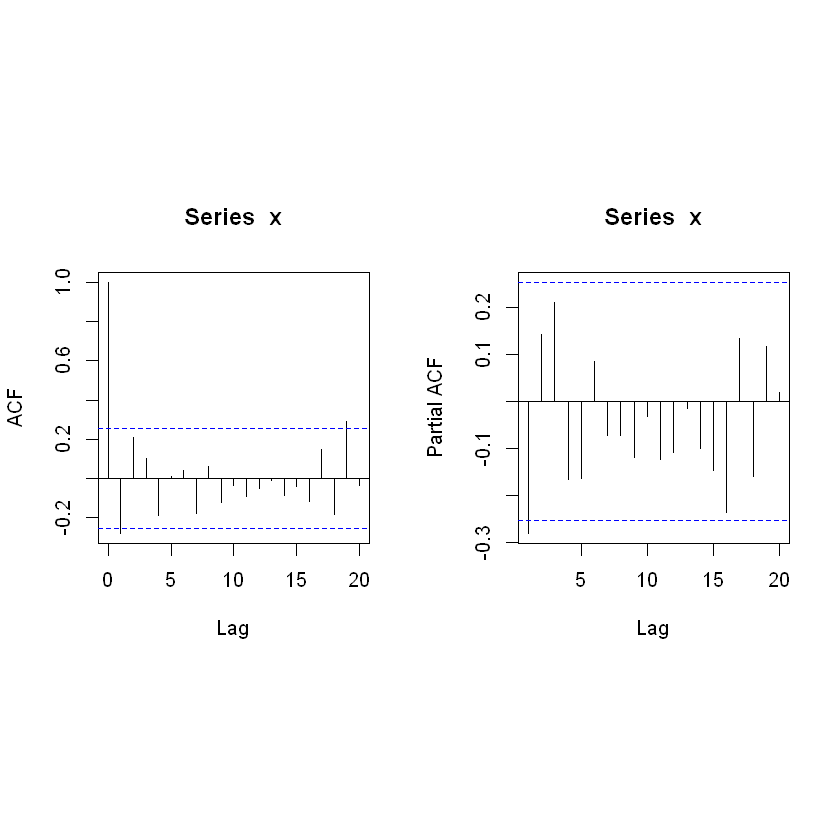

In [8]:
# Time Series in R
# Listing R.8
# Last updated June 2018
#
#

x = rt(60, df = 5)  # Create hypothetical dataset x

par(mfrow=c(1,2), pty='s')

acf(x,20)           # autocorrelation for lags 1:20
pacf(x,20)          # partial autocorrelation for lags 1:20

In [9]:
# Loops and Functions in R
# Listing R.9
# Last updated June 2018
#
#

## For loops

for (i in 3:7)        # iterates through [3,4,5,6,7]
    print(i^2)      

## If-else loops

X = 10

if (X %% 3 == 0) {
    print("X is a multiple of 3")
} else {
    print("X is not a multiple of 3")
}
    
## Functions (example: a simple excess kurtosis function)

excess_kurtosis = function(x, excess = 3){ # note: excess optional, default=3
    m4 = mean((x-mean(x))^4)
    excess_kurt = m4/(sd(x)^4) - excess
    excess_kurt
}

x = rt(60, df = 5)                         # Create hypothetical dataset x

excess_kurtosis(x)      

[1] 9
[1] 16
[1] 25
[1] 36
[1] 49
[1] "X is not a multiple of 3"


[1] 2.849669

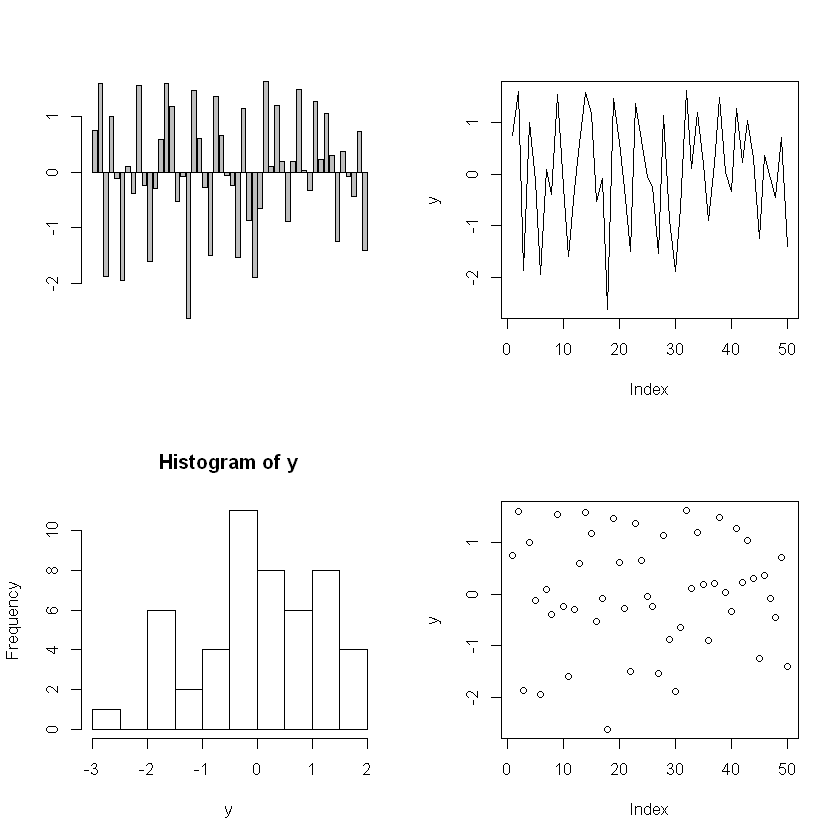

In [10]:
# Basic Graphs in R
# Listing R.10
# Last updated June 2018
#
#

y = rnorm(50, mean = 0, sd = 1)

par(mfrow=c(2,2)) # sets up space for subplots

barplot(y)        # bar plot
plot(y,type='l')  # line plot
hist(y)           # histogram
plot(y)           # scatter plot

In [11]:
# Miscellaneous Useful Functions in R
# Listing R.11
# Last updated June 2018
#
#

## Convert objects from one type to another with as.integer() etc
## To check type, use typeof(object)

x = 8.0

print(typeof(x))

x = as.integer(x)

print(typeof(x))

[1] "double"
[1] "integer"


<a id='1'></a>
***

# Chapter 1: Financial Markets, Prices and Risk

-  1.1: Loading hypothetical stock prices, converting to returns, plotting returns
-  1.3: Summary statistics for returns timeseries
-  1.5: Autocorrelation function (ACF) plots, Ljung-Box test
-  1.7: Quantile-Quantile (QQ) plots
-  1.9: Correlation matrix between different stocks

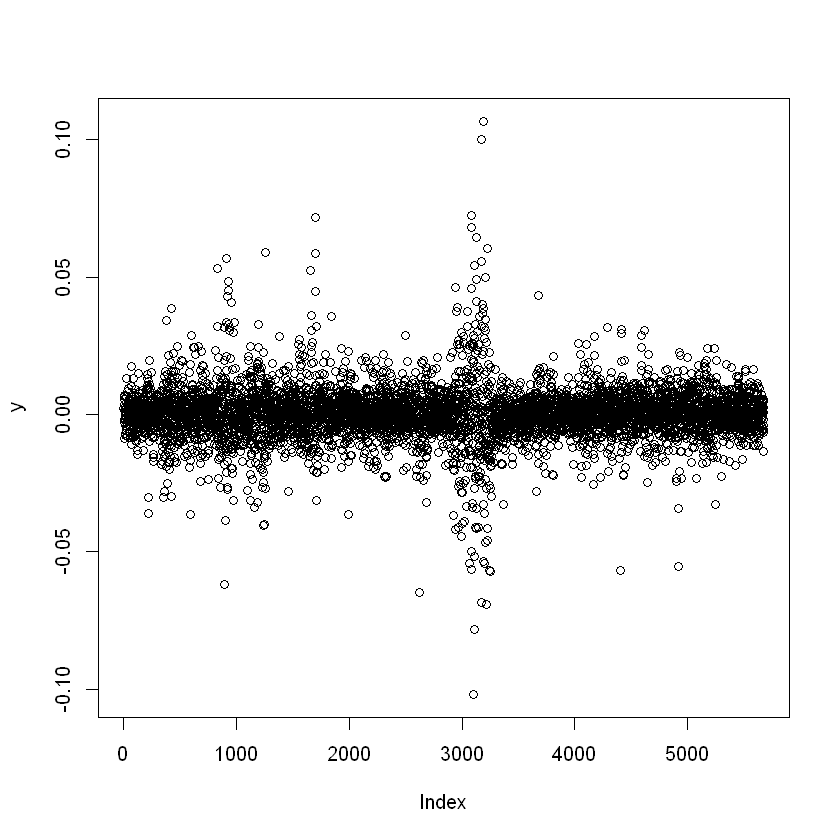

In [12]:
# Download S&P500 data in R
# Listing 1.1
# Last updated August 2019
#
#


 
price = read.csv('index.csv')
y=diff(log(price$Index))  # calculate returns
plot(y)             # plot returns

In [13]:
# Sample statistics in R
# Listing 1.3
# Last updated July 2020
#
#

library(moments)
library(tseries)

mean(y)
sd(y)
min(y)
max(y)
skewness(y)
kurtosis(y)
jarque.bera.test(y)

[1] 0.0002581599

[1] 0.01000573

[1] -0.1019555

[1] 0.1067359

[1] 0.1526333

[1] 16.98117


	Jarque Bera Test

data:  y
X-squared = 46251, df = 2, p-value < 2.2e-16



	Box-Ljung test

data:  y
X-squared = 93.488, df = 20, p-value = 1.809e-11



	Box-Ljung test

data:  y^2
X-squared = 2543, df = 20, p-value < 2.2e-16


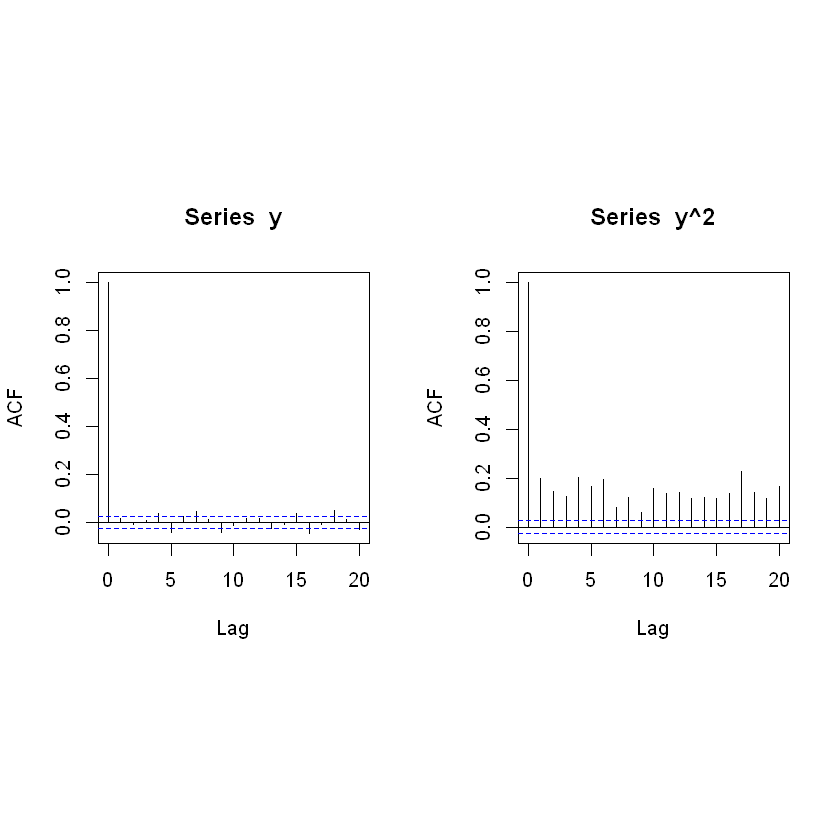

In [14]:
# ACF plots and the Ljung-Box test in R
# Listing 1.5
# Last updated July 2020
#
#

library(MASS)
library(stats)

par(mfrow=c(1,2), pty="s")
q = acf(y,20)
q1 = acf(y^2,20)

Box.test(y, lag = 20, type = c("Ljung-Box"))
Box.test(y^2, lag = 20, type = c("Ljung-Box"))

Loading required package: carData


[1] 3192 3101

[1] 3192 3101

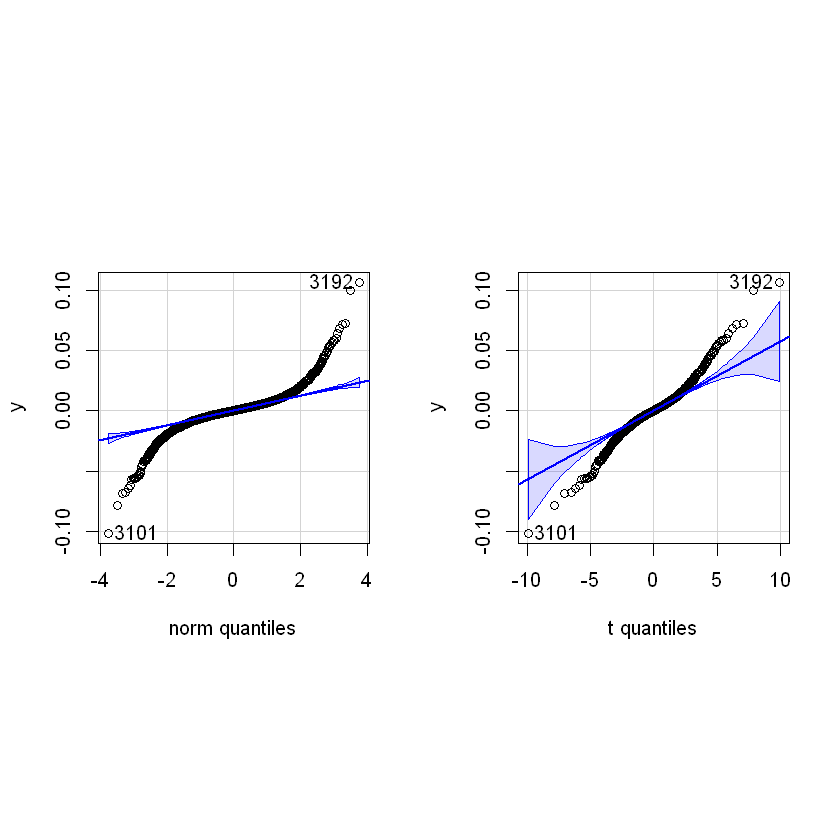

In [15]:
# QQ plots in R
# Listing 1.7
# Last updated June 2018
#
#

library(car)

par(mfrow=c(1,2), pty="s")

qqPlot(y)
qqPlot(y,distribution="t",df=5)

In [16]:
# Download stock prices in R
# Listing 1.9
# Last updated June 2018
#
#

p = read.csv('stocks.csv')

y=apply(log(p),2,diff)
print(cor(y)) # correlation matrix

          A         B         C
A 1.0000000 0.2296842 0.2126192
B 0.2296842 1.0000000 0.1450511
C 0.2126192 0.1450511 1.0000000


<a id='2'></a>
***

# Chapter 2: Univariate Volatility Modelling

-  2.1: GARCH and t-GARCH estimation
-  2.3: APARCH estimation

In [17]:
# ARCH and GARCH estimation in R
# Listing 2.1
# Last updated July 2020
#
#

library(rugarch)

p = read.csv('index.csv')

## We multiply returns by 100 and de-mean them
y=diff(log(p$Index))*100
y=y-mean(y)

## GARCH(1,1)
spec1 = ugarchspec(variance.model = list( garchOrder = c(1, 1)),
 mean.model = list( armaOrder = c(0,0),include.mean = FALSE))
res1 = ugarchfit(spec = spec1, data = y)

## ARCH(1)
spec2 = ugarchspec(variance.model = list( garchOrder = c(1, 0)),
 mean.model = list( armaOrder = c(0,0),include.mean = FALSE))
res2 = ugarchfit(spec = spec2, data = y)

## tGARCH(1,1)
spec3 = ugarchspec(variance.model = list( garchOrder = c(1, 1)),
 mean.model = list( armaOrder = c(0,0),include.mean = FALSE), 
 distribution.model = "std")
res3 = ugarchfit(spec = spec3, data = y)

## plot(res) shows various graphical analysis, works in command line

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"package 'rugarch' was built under R version 3.6.3"Loading required package: parallel

Attaching package: 'rugarch'

The following object is masked from 'package:stats':

    sigma



In [18]:
# Advanced ARCH and GARCH estimation in R
# Listing 2.3
# Last updated July 2020
#
#

## Normal APARCH(1,1)
spec4 = ugarchspec(variance.model = list(model="apARCH", garchOrder = c(1, 1)),
 mean.model = list( armaOrder = c(0,0),include.mean = FALSE))
res4 = ugarchfit(spec = spec4, data = y)
## show(res4)

## Normal APARCH(1,1) with fixed delta
spec5 = ugarchspec(variance.model = list(model="apARCH", garchOrder = c(1, 1)),
 mean.model = list( armaOrder = c(0,0),include.mean = FALSE), fixed.pars=list(delta=2))
res5 = ugarchfit(spec = spec5, data = y)
show(res5)



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: apARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
omega   0.013024    0.001742   7.47834  0.00000
alpha1  0.068106    0.005309  12.82897  0.00000
beta1   0.918173    0.005618 163.42362  0.00000
gamma1  0.009355    0.031721   0.29493  0.76805
delta   2.000000          NA        NA       NA

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.013024    0.003600  3.61723 0.000298
alpha1  0.068106    0.009486  7.17951 0.000000
beta1   0.918173    0.012216 75.16401 0.000000
gamma1  0.009355    0.060855  0.15373 0.877823
delta   2.000000          NA       NA       NA

LogLikelihood : -6970.28 

Information Criteria
------------------------------------
          

<a id='3'></a>
***

# Chapter 3: Multivariate Volatility Models

-  3.1: Loading hypothetical stock prices
-  3.3: EWMA estimation
-  3.5: OGARCH estimation
-  3.7: DCC estimation
-  3.9: Comparison of EWMA, OGARCH, DCC

In [19]:
# Download stock prices in R
# Listing 3.1
# Last updated August 2019
#
#


p = read.csv('stocks.csv')
y=apply(log(p),2,diff)     # calculate returns
y = y[,1:2]                # consider first two stocks
y[,1] = y[,1]-mean(y[,1])  # subtract mean
y[,2] = y[,2]-mean(y[,2])
TT = dim(y)[1]

In [20]:
# EWMA in R
# Listing 3.3
# Last updated August 2019
#
#

## create a matrix to hold covariance matrix for each t
EWMA = matrix(nrow=TT,ncol=3)   
lambda = 0.94
S = cov(y)                      # initial (t=1) covar matrix
EWMA[1,] = c(S)[c(1,4,2)]       # extract var and covar
for (i in 2:dim(y)[1]){  
      S = lambda*S+(1-lambda)*  y[i-1,] %*% t(y[i-1,])
      EWMA[i,] = c(S)[c(1,4,2)] 
}
EWMArho = EWMA[,3]/sqrt(EWMA[,1]*EWMA[,2]) # calculate correlations

print(head(EWMArho))
print(tail(EWMArho))

[1] 0.2296842 0.2236347 0.2218277 0.2270681 0.2054204 0.1992979
[1] 0.1931994 0.1914987 0.2177147 0.3436632 0.3122741 0.3159703


In [21]:
# GOGARCH in R
# Listing 3.5
# Last updated August 2019
#
#

library(rmgarch)
spec = gogarchspec(mean.model = list(armaOrder = c(0, 0), 
    include.mean =FALSE),
    variance.model = list(model = "sGARCH", 
    garchOrder = c(1,1)) , 
    distribution.model =  "mvnorm"
)
fit = gogarchfit(spec = spec, data = y)

show(fit) 


Warning message:
"package 'rmgarch' was built under R version 3.6.3"


*------------------------------*
*        GO-GARCH Fit          *
*------------------------------*

Mean Model		: CONSTANT
GARCH Model		: sGARCH
Distribution	: mvnorm
ICA Method		: fastica
No. Factors		: 2
No. Periods		: 5676
Log-Likelihood	: 40378.57
------------------------------------

U (rotation matrix) : 

       [,1]  [,2]
[1,] -0.358 0.934
[2,]  0.934 0.358

A (mixing matrix) : 

         [,1]     [,2]
[1,] -0.00642 0.000213
[2,] -0.00187 0.009296



In [22]:
# DCC in R
# Listing 3.7
# Last updated August 2019
#
#


xspec = ugarchspec(mean.model = list(armaOrder = c(0, 0), include.mean = FALSE))

uspec = multispec(replicate(2, xspec))

spec = dccspec(uspec = uspec, dccOrder = c(1, 1), distribution = 'mvnorm')

res = dccfit(spec, data = y)

H=res@mfit$H

DCCrho=vector(length=dim(y)[1])

for(i in 1:dim(y)[1]){
    DCCrho[i] =  H[1,2,i]/sqrt(H[1,1,i]*H[2,2,i])
}

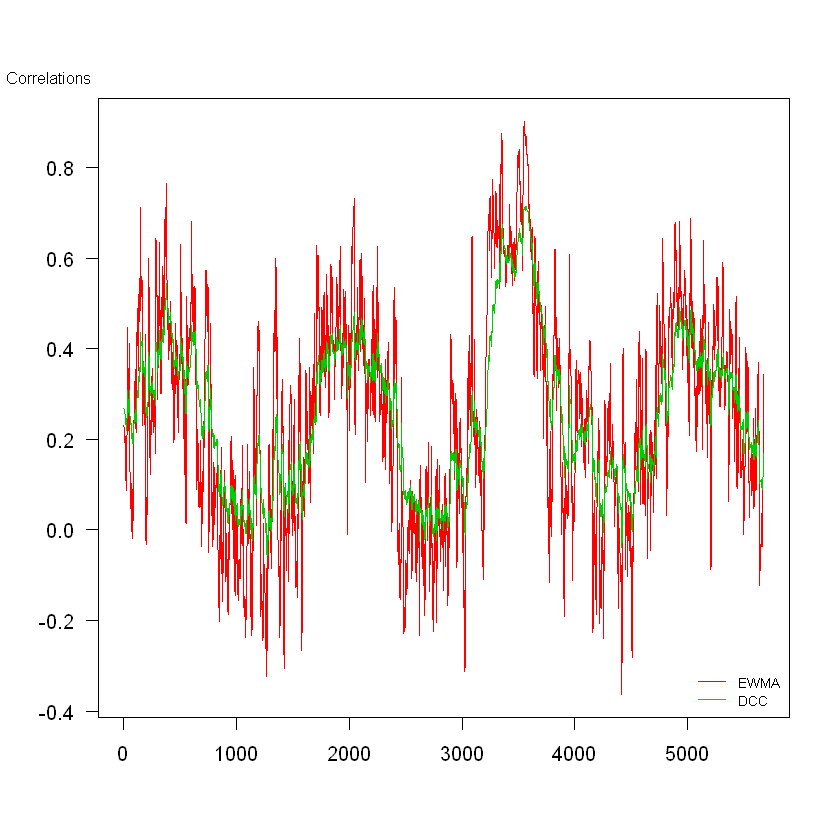

In [23]:
# Sample statistics in R
# Listing 3.9
# Last updated August 2019
#
#

matplot(cbind(EWMArho,DCCrho),type='l',las=1,lty=1,col=2:3,ylab="")
mtext("Correlations",side=2,line=0.3,at=1,las=1,cex=0.8)
legend("bottomright",c("EWMA","DCC"),lty=1,col=2:3,bty="n",cex=0.7)

<a id='4'></a>
***

# Chapter 4: Risk Measures

-  4.1: Expected Shortfall (ES) estimation under normality assumption

In [24]:
# ES in R
# Listing 4.1
# Last updated August 2016
#
#

p = c(0.5,0.1,0.05,0.025,0.01,0.001)
VaR = -qnorm(p)
ES = dnorm(qnorm(p))/p

cat("Probabilities:", paste0(p*100,"%"), "\n",
   "VaR:", VaR, "\n",
   "ES:", ES)

Probabilities: 50% 10% 5% 2.5% 1% 0.1% 
 VaR: 0 1.281552 1.644854 1.959964 2.326348 3.090232 
 ES: 0.7978846 1.754983 2.062713 2.337803 2.665214 3.36709

<a id='5'></a>
***

# Chapter 5: Implementing Risk Forecasts

-  5.1: Loading hypothetical stock prices, converting to returns
-  5.3: Univariate HS Value at Risk (VaR)
-  5.5: Multivariate HS VaR
-  5.7: Univariate ES VaR
-  5.9: Normal VaR
-  5.11: Portfolio Normal VaR
-  5.13: Student-t VaR
-  5.15: Normal ES VaR
-  5.17: Direct Integration Normal ES VaR
-  5.19: MA Normal VaR
-  5.21: EWMA VaR
-  5.23: Two-asset EWMA VaR
-  5.25: GARCH(1,1) VaR

In [25]:
# Download stock prices in R
# Listing 5.1
# Last updated July 2020
#
#

p = read.csv('stocks.csv')

## Calculate returns. Note that first column is dates
y = apply(log(p),2,diff)

## Specify portfolio value and VaR probability
portfolio_value = 1000 
p = 0.01

In [26]:
# Univariate HS in R
# Listing 5.3
# Last updated July 2020
#
#


y1 = y[,1]                     # select one asset
ys = sort(y1)                  # sort returns
op = ceiling(length(y1)*p)     # p percent smallest, rounded up
VaR1 = -ys[op]*portfolio_value
print(VaR1)

[1] 17.49822


In [27]:
# Multivariate HS in R
# Listing 5.5
# Last updated July 2020
#
#

w = matrix(c(0.3,0.2,0.5))   # vector of portfolio weights

## The number of columns of the left matrix must be the same as the number of rows of the right matrix 

yp = y %*% w                 # obtain portfolio returns
yps = sort(yp)
VaR2 = -yps[op]*portfolio_value
print(VaR2)

[1] 14.20901


In [28]:
# Univariate ES in R
# Listing 5.7
# Last updated August 2019
#
#

ES1 = -mean(ys[1:op])*portfolio_value

print(ES1)

[1] 22.56339


In [29]:
# Normal VaR in R
# Listing 5.9
# Last updated August 2019
#
#

sigma = sd(y1) # estimate volatility
VaR3 = -sigma * qnorm(p) * portfolio_value

print(VaR3)

[1] 14.94957


In [30]:
# Portfolio normal VaR in R
# Listing 5.11
# Last updated August 2019
#
#

sigma = sqrt(t(w) %*% cov(y) %*% w)[1] # portfolio volatility
## Note: the trailing [1] is to convert a single element matrix to float

VaR4 = -sigma * qnorm(p)*portfolio_value

print(VaR4)

[1] 12.27959


In [31]:
# Student-t VaR in R
# Listing 5.13
# Last updated July 2020
#
#

library(QRM)

scy1 = (y1)*100                     # scale the returns 
res = fit.st(scy1) 
sigma1 = unname(res$par.ests['sigma']/100)  # rescale the volatility
nu = unname(res$par.ests['nu'])
## Note: We are removing the names of the fit.st output using unname()

VaR5 = - sigma1 * qt(df=nu,p=p) *  portfolio_value

print(VaR5)

Warning message:
"package 'QRM' was built under R version 3.6.3"Loading required package: gsl
Loading required package: Matrix
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"Loading required package: numDeriv
Loading required package: timeSeries
Warning message:
"package 'timeSeries' was built under R version 3.6.3"Loading required package: timeDate

Attaching package: 'timeDate'

The following objects are masked from 'package:moments':

    kurtosis, skewness


Attaching package: 'QRM'

The following object is masked from 'package:base':

    lbeta



[1] 17.12558


In [32]:
# Normal ES in R
# Listing 5.15
# Last updated June August 2019
#
#

sigma = sd(y1)
ES2 = sigma*dnorm(qnorm(p))/p * portfolio_value

print(ES2)

[1] 17.12719


In [33]:
# Direct integration ES in R
# Listing 5.17
# Last updated July 2020
#
#

VaR = -qnorm(p)
integrand = function(q){q*dnorm(q)}
ES = -sigma*integrate(integrand,-Inf,-VaR)$value/p*portfolio_value

print(ES)

[1] 17.12719


In [34]:
# MA normal VaR in R
# Listing 5.19
# Last updated June August 2019
#
#

WE=20
for (t in seq(length(y1)-5,length(y1))){
  t1=t-WE+1
  window= y1[t1:t] # estimation window
  sigma=sd(window)
  VaR6 = -sigma * qnorm(p) * portfolio_value
  print(VaR6)
}

[1] 16.0505
[1] 16.1491
[1] 18.85435
[1] 18.88212
[1] 16.23053
[1] 16.16976


In [35]:
# EWMA VaR in R
# Listing 5.21
# Last updated July 2020
#
#

lambda = 0.94
s11 = var(y1)             # initial variance, using unconditional
for (t in 2:length(y1)){ 
  s11 = lambda * s11  + (1-lambda) * y1[t-1]^2
}
VaR7 = -qnorm(p) * sqrt(s11) * portfolio_value

print(VaR7)

[1] 16.75344


In [36]:
# Three-asset EWMA VaR in R
# Listing 5.23
# Last updated August 2019
#
#

s = cov(y)                        # initial covariance
for (t in 2:dim(y)[1]){
  s = lambda*s + (1-lambda)*y[t-1,] %*% t(y[t-1,])
}
sigma = sqrt(t(w) %*% s %*% w)[1] # portfolio vol
## Note: trailing[1] is to convert single element matrix to float

VaR8 = -sigma * qnorm(p) * portfolio_value

print(VaR8)

[1] 11.50952


In [37]:
# Univariate GARCH in R
# Listing 5.25
# Last updated July 2020
#
#
library(rugarch)

spec = ugarchspec(variance.model = list( garchOrder = c(1, 1)),
                  mean.model = list( armaOrder = c(0,0),include.mean = FALSE))
res = ugarchfit(spec = spec, data = y1)

omega = res@fit$coef['omega']
alpha = res@fit$coef['alpha1']
beta = res@fit$coef['beta1']
sigma2 = omega + alpha * tail(y1,1)^2 + beta * tail(res@fit$var,1)  
VaR9 = -sqrt(sigma2) * qnorm(p) * portfolio_value 
names(VaR9)="VaR"
print(VaR9)

     VaR 
16.87364 


<a id='6'></a>
***

# Chapter 6: Analytical Value-at-Risk for Options and Bonds

-  6.1: Black-Scholes function definition
-  6.3: Black-Scholes option price calculation example

In [38]:
# Black-Scholes function in R
# Listing 6.1
# Last updated 2011
#
#

bs = function(X, P, r, sigma, T){
	d1 = (log(P/X) + (r + 0.5*sigma^2)*(T))/(sigma*sqrt(T))
	d2 = d1 - sigma*sqrt(T)

	Call = P*pnorm(d1,mean=0,sd=1)-X*exp(-r*(T))*pnorm(d2,mean=0,sd=1)
	Put = X*exp(-r*(T))*pnorm(-d2,mean=0,sd=1)-P*pnorm(-d1,mean=0,sd=1)

	Delta.Call = pnorm(d1, mean = 0, sd = 1) 
	Delta.Put = Delta.Call - 1
	Gamma = dnorm(d1, mean = 0, sd = 1)/(P*sigma*sqrt(T))

	return(list(Call=Call,Put=Put,Delta.Call=Delta.Call,Delta.Put=Delta.Put,Gamma=Gamma))
}

In [39]:
# Black-Scholes in R
# Listing 6.3
# Last updated July 2020
#
#

f = bs(X = 90, P = 100, r = 0.05, sigma = 0.2, T = 0.5)

print(f)

$Call
[1] 13.49852

$Put
[1] 1.27641

$Delta.Call
[1] 0.8395228

$Delta.Put
[1] -0.1604772

$Gamma
[1] 0.01723826



<a id='7'></a>
***

# Chapter 7: Simulation Methods for VaR for Options and Bonds

-  7.1: Plotting normal distribution transformation
-  7.3: Random number generation from Uniform(0,1), Normal(0,1)
-  7.5: Bond pricing using yield curve
-  7.7: Yield curve simulations
-  7.9: Bond price simulations
-  7.11: Black-Scholes analytical pricing of call
-  7.13: Black-Scholes Monte Carlo simulation pricing of call
-  7.15: Option density plots
-  7.17: VaR simulation of portfolio with only underlying
-  7.19: VaR simulation of portfolio with only call
-  7.21: VaR simulation of portfolio with call, put and underlying
-  7.23: Simulated two-asset returns
-  7.25: Two-asset portfolio VaR
-  7.27: Two-asset portfolio VaR with a call

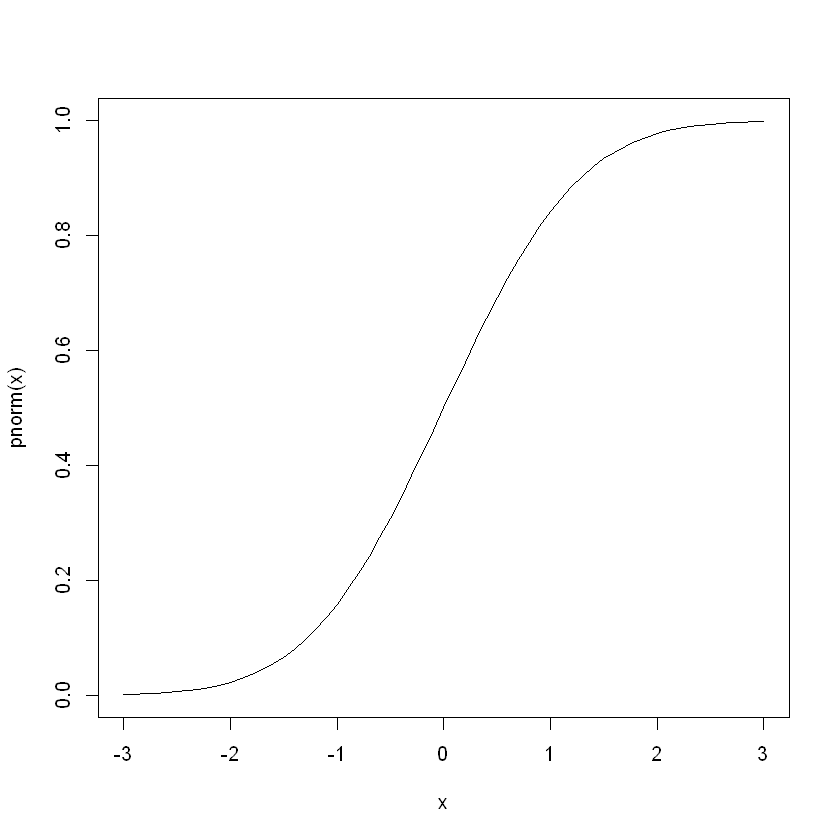

In [40]:
# Transformation in R
# Listing 7.1
# Last updated 2011
#
#

x = seq(-3, 3, by = 0.1)
plot(x, pnorm(x), type = "l")

In [41]:
# Various RNs in R
# Listing 7.3
# Last updated 2011
#
#

set.seed(12) # set seed

S = 10
runif(S)
rnorm(S)
rt(S,4)

[1] 0.069360916 0.817775199 0.942621732 0.269381876 0.169348123 0.033895622
 [7] 0.178785004 0.641665366 0.022877743 0.008324827

[1] -0.27229604 -0.31534871 -0.62825524 -0.10646388  0.42801480 -0.77771958
 [7] -1.29388230 -0.77956651  0.01195176 -0.15241624

[1] -0.5468652  0.3257662 -0.3103448  1.6401196 -0.6006579 -0.5043973
 [7]  0.1466749  0.4216070 -1.1096902  0.6741022

In [42]:
# Price bond in R
# Listing 7.5
# Last updated July 2020
#
#

yield = c(5.00, 5.69, 6.09, 6.38, 6.61,
        6.79, 6.94, 7.07, 7.19, 7.30)   # yield curve
T = length(yield)                       # number of time periods
r = 0.07                                # initial yield rate
Par = 10                                # par value
coupon = r * Par                        # coupon payments
cc = rep(coupon, T)                     # vector of cash flows
cc[T] = cc[T] + Par                     # add par to cash flows
P = sum(cc/((1+yield/100)^(1:T)))      # calculate price

print(P)

[1] 9.913206


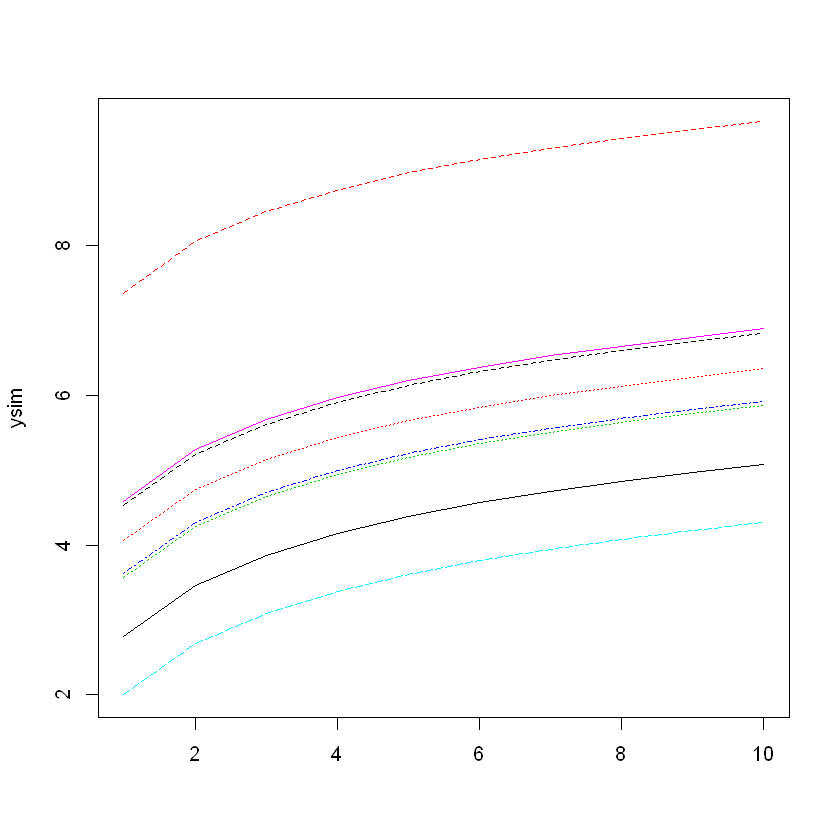

In [43]:
# Simulate yields in R
# Listing 7.7
# Last updated August 2019
#
#

set.seed(12)                           # set seed

sigma = 1.5                            # daily yield volatiltiy
S = 8                                  # number of simulations
r = rnorm(S, 0, sigma)                 # generate random numbers 
ysim = matrix(nrow=length(yield),ncol=S)
for (i in 1:S) ysim[,i]=yield+r[i]
matplot(ysim,type='l')

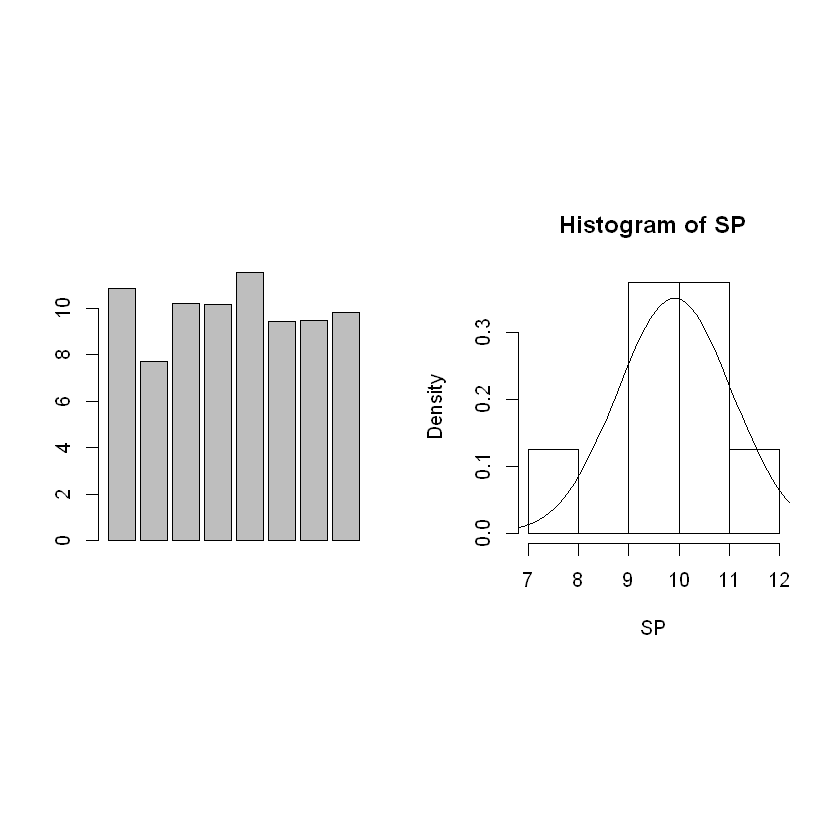

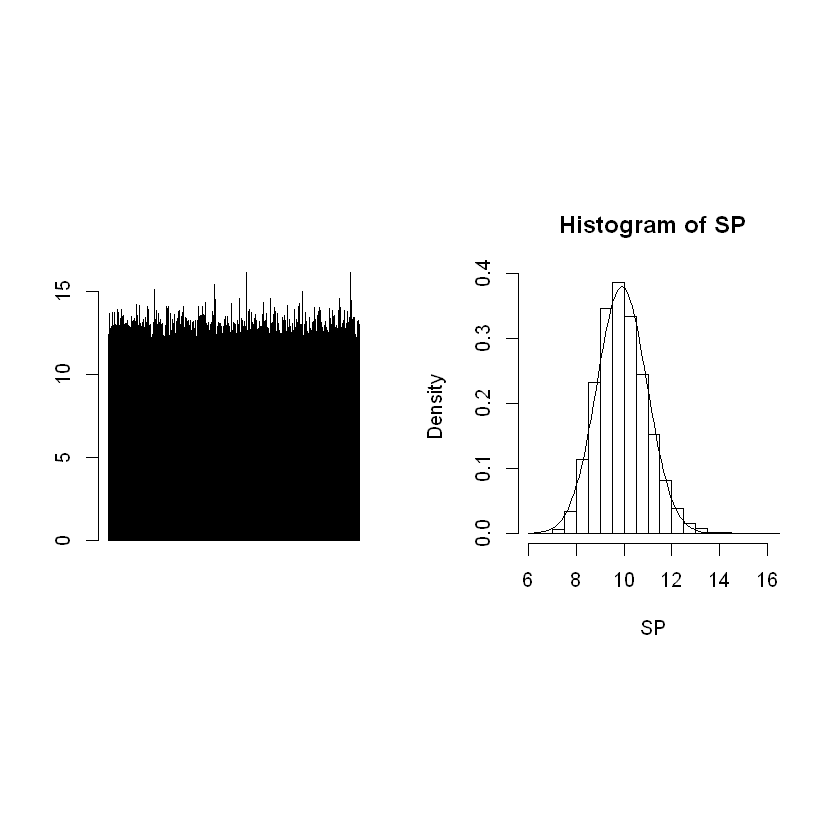

In [44]:
# Simulate bond prices in R
# Listing 7.9
# Last updated November 2020
#
#

SP = rep(NA, length = S)
for (i in 1:S){                            # S simulations
  SP[i] = sum(cc/((1+ysim[,i]/100)^(1:T)))
}
SP = SP-(mean(SP) - P)                     # correct for mean

par(mfrow=c(1,2), pty="s")

barplot(SP)

hist(SP,probability=TRUE)
x=seq(6,16,length=100)
lines(x, dnorm(x, mean = mean(SP), sd = sd(SP)))


S = 50000
r = rnorm(S, 0, sigma)                 # generate random numbers 
ysim = matrix(nrow=length(yield),ncol=S)
for (i in 1:S) ysim[,i]=yield+r[i]

SP = rep(NA, length = S)
for (i in 1:S){                            # S simulations
  SP[i] = sum(cc/((1+ysim[,i]/100)^(1:T)))
}
SP = SP-(mean(SP) - P)                     # correct for mean

par(mfrow=c(1,2), pty="s")

barplot(SP)

hist(SP,probability=TRUE)
x=seq(6,16,length=100)
lines(x, dnorm(x, mean = mean(SP), sd = sd(SP)))

In [45]:
# Black-Scholes valuation in R
# Listing 7.11
# Last updated July 2020
#
#

P0 = 50                          # initial spot price
sigma = 0.2                      # annual volatility
r = 0.05                         # annual interest
TT = 0.5                         # time to expiration
X = 40                           # strike price
f = bs(X = X, P = P0, r = r, sigma = sigma, T = TT)          # analytical call price
## This calculation uses the Black-Scholes pricing function (Listing 6.1/6.2)

print(f)

$Call
[1] 11.08728

$Put
[1] 0.09967718

$Delta.Call
[1] 0.9660259

$Delta.Put
[1] -0.03397407

$Gamma
[1] 0.01066378



In [46]:
# Black-Scholes simulation in R
# Listing 7.13
# Last updated July 2020
#
#

set.seed(12)                                   # set seed

S = 1e6                                        # number of simulations
F = P0*exp(r*TT)                               # futures price
ysim = rnorm(S,-0.5*sigma^2*TT,sigma*sqrt(TT)) # sim returns, lognorm corrected
F = F*exp(ysim)                                # sim futures price
SP = F-X                                       # payoff
SP[SP<0] = 0                                   # set negative outcomes to zero
fsim = SP*exp(-r*TT)                           # discount
call_sim = mean(fsim)                          # simulated price

print(call_sim)

[1] 11.08709


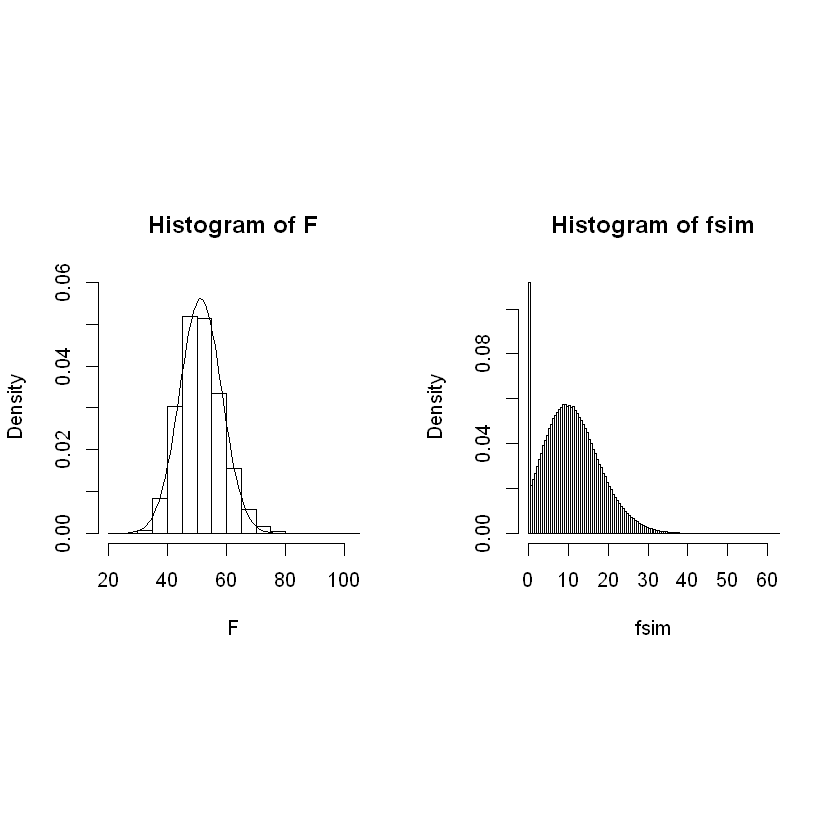

In [47]:
# Option density plots in R
# Listing 7.15
# Last updated 2011
#
#

par(mfrow=c(1,2), pty="s")

hist(F, probability=TRUE, ylim=c(0,0.06))

x = seq(min(F), max(F), length=100)
lines(x, dnorm(x, mean = mean(F), sd = sd(SP)))
hist(fsim, nclass=100, probability=TRUE)

In [48]:
# Simulate VaR in R
# Listing 7.17
# Last updated 2011
#
#

set.seed(1)                            # set seed

S = 1e7                                # number of simulations
s2 = 0.01^2                            # daily variance
p = 0.01                               # probability
r = 0.05                               # annual riskfree rate
P = 100                                # price today
ysim = rnorm(S,r/365-0.5*s2,sqrt(s2))  # sim returns
Psim = P*exp(ysim)                     # sim future prices
q = sort(Psim-P)                       # simulated P/L
VaR1 = -q[p*S]

print(VaR1)

[1] 2.289809


In [49]:
# Simulate option VaR in R
# Listing 7.19
# Last updated July 2020
#
#

TT = 0.25                                         # time to expiration
X = 100                                           # strike price
sigma = sqrt(s2*250)                              # annual volatility
f = bs(X, P, r, sigma, TT)                        # analytical call price
fsim = bs(X,Psim,r,sigma,TT-(1/365))              # sim option prices 
q = sort(fsim$Call-f$Call)                        # simulated P/L
VaR2 = -q[p*S]

print(VaR2)

[1] 1.214623


In [50]:
# Example 7.3 in R
# Listing 7.21
# Last updated August 2016
#
#

X1 = 100                                 
X2 = 110                                 
f1 = bs(X1, P, r, sigma, TT)                 
f2 = bs(X2, P, r, sigma, TT)                 
f2sim = bs(X2, Psim, r, sigma, TT-(1/365))
f1sim = bs(X1, Psim, r, sigma, TT-(1/365))
q = sort(f1sim$Call + f2sim$Put + Psim-f1$Call - f2$Put-P); 
VaR3 = -q[p*S]

print(VaR3)

[1] 1.494695


In [51]:
# Simulated two-asset returns in R
# Listing 7.23
# Last updated July 2020
#
#

library (MASS)

set.seed(12)  # set seed

mu = rep(r/365, 2)                                    # return mean
Sigma = matrix(c(0.01, 0.0005, 0.0005, 0.02),ncol=2)  # covariance matrix
y = mvrnorm(S,mu,Sigma)  # simulated returns

In [52]:
# Two-asset VaR in R
# Listing 7.25
# Last updated July 2020
#
#

K=2
P = c(100, 50)                                 # prices
x = rep(1, 2)                                  # number of assets
Port = P %*% x                                 # portfolio at t
Psim = matrix(t(matrix(P,K,S)),ncol=K)*exp(y)  # simulated prices
PortSim = Psim %*% x                           # simulated portfolio value
q = sort(PortSim-Port[1,1])                    # simulated P/L
VaR4 = -q[S*p]

print(VaR4)

[1] 25.96307


In [53]:
# A two-asset case in R with an option
# Listing 7.27
# Last updated July 2020
#
#

f = bs(X = P[2], P = P[2], r = r, sigma = sigma, T = TT)
fsim = bs(X = P[2], P = Psim[,2], r = r, sigma = sigma, T = TT-(1/365))
q = sort(fsim$Call + Psim[,1] - f$Call - P[1]); 
VaR5 = -q[p*S]

print(VaR5)

[1] 20.79232


<a id='8'></a>
***

# Chapter 8: Backtesting and Stress Testing

-  8.1: Loading hypothetical stock prices, converting to returns
-  8.3: Setting up backtest 
-  8.5: Running backtest for EWMA/MA/HS/GARCH VaR
-  8.7: Backtesting analysis for EWMA/MA/HS/GARCH VaR
-  8.9: Bernoulli coverage test
-  8.11: Independence test
-  8.13: Running Bernoulli/Independence test on backtests
-  8.15: Running backtest for EWMA/HS ES
-  8.17: Backtesting analysis for EWMA/HS ES

In [54]:
# Load data in R
# Listing 8.1
# Last updated July 2020
#
#


p = read.csv('index.csv')
y = diff(log(p$Index)) # get returns 

In [55]:
# Set backtest up in R
# Listing 8.3
# Last updated July 2020
#
#

WE = 1000                             # estimation window length
p = 0.01                              # probability
l1 = ceiling(WE*p)                    # HS quantile
portfolio_value = 1                   # portfolio value
VaR = matrix(nrow=length(y),ncol=4)   # matrix for forecasts

## EWMA setup
lambda = 0.94       
s11 = var(y)
for(t in 2:WE) {
    s11=lambda*s11+(1-lambda)*y[t-1]^2
}

In [56]:
# Running backtest in R
# Listing 8.5
# Last updated July 2020
#
#
## this will take several minutes to run

library(rugarch)
spec = ugarchspec(variance.model = list( garchOrder = c(1, 1)),
                  mean.model = list( armaOrder = c(0,0),include.mean = FALSE))
start_time <- Sys.time()
for (t in (WE+1):length(y)){
  t1 = t-WE;         # start of the data window
  t2 = t-1;	         # end of the data window
  window = y[t1:t2]  # data for estimation
  
  s11 = lambda*s11 + (1-lambda)*y[t-1]^2
  VaR[t,1] = -qnorm(p) * sqrt(s11) * portfolio_value          # EWMA
  
  VaR[t,2] = - sd(window) * qnorm(p)*portfolio_value          # MA
  
  ys = sort(window)                              
  VaR[t,3] = -ys[l1]*portfolio_value                          # HS
  
  res = ugarchfit(spec = spec, data = window,solver="hybrid")

  omega = res@fit$coef['omega']
  alpha = res@fit$coef['alpha1']
  beta = res@fit$coef['beta1']
  sigma2 = omega + alpha * tail(window,1)^2 + beta * tail(res@fit$var,1)  
  VaR[t,4] = -sqrt(sigma2) * qnorm(p) * portfolio_value       # GARCH(1,1)
}
end_time <- Sys.time()
print(end_time - start_time)

Time difference of 5.200304 mins


1 VR 2.074423 VaR vol 0.01211406 
2 VR 1.860565 VaR vol 0.006622265 
3 VR 1.240376 VaR vol 0.01229172 
4 VR 1.73225 VaR vol 0.01146659 


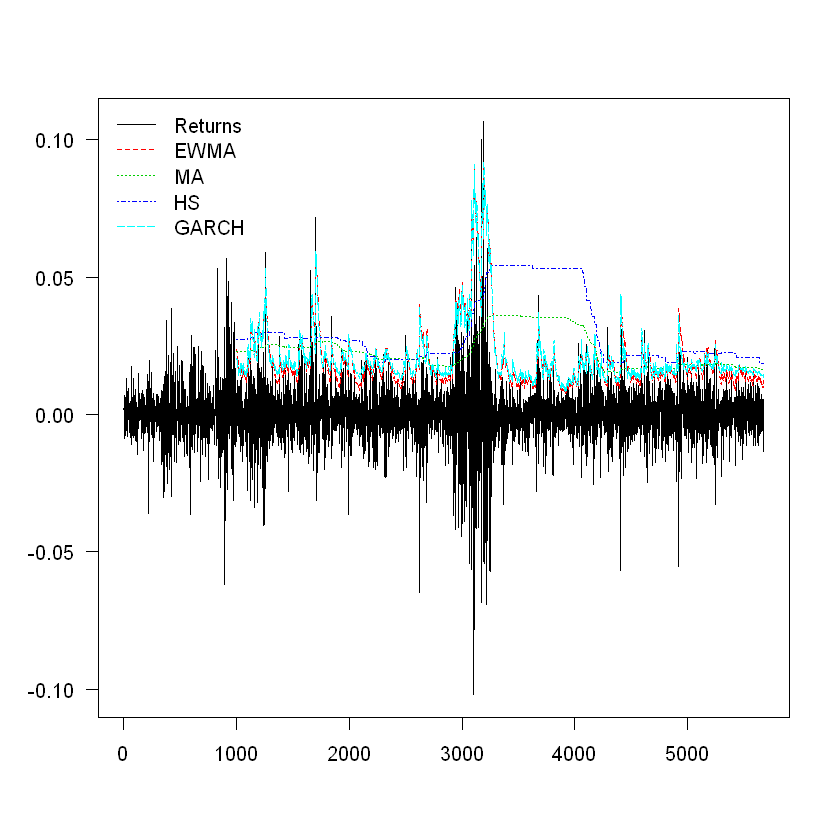

In [57]:
# Backtesting analysis in R
# Listing 8.7
# Last updated August 2019
#
#

for (i in 1:4){
  VR = sum(y[(WE+1):length(y)]< -VaR[(WE+1):length(y),i])/(p*(length(y)-WE))
  s = sd(VaR[(WE+1):length(y),i])
  cat(i,"VR",VR,"VaR vol",s,"\n")
}
matplot(cbind(y,VaR),type='l',col=1:5,las=1,ylab="",lty=1:5)
legend("topleft",legend=c("Returns","EWMA","MA","HS","GARCH"),lty=1:5,col=1:5,bty="n")

In [58]:
# Bernoulli coverage test in R
# Listing 8.9
# Last updated August 2016
#
#

bern_test=function(p,v){
  lv=length(v)
  sv=sum(v)
  
  al=log(p)*sv+log(1-p)*(lv-sv)
  bl=log(sv/lv)*sv +log(1-sv/lv)*(lv-sv)
  return(-2*(al-bl))
}

In [59]:
# Independence test in R
# Listing 8.11
# Last updated June 2018
#
#

ind_test=function(V){
  J=matrix(ncol=4,nrow=length(V))
  for (i in 2:length(V)){
    J[i,1]=V[i-1]==0 & V[i]==0
    J[i,2]=V[i-1]==0 & V[i]==1
    J[i,3]=V[i-1]==1 & V[i]==0
    J[i,4]=V[i-1]==1 & V[i]==1
  }
  V_00=sum(J[,1],na.rm=TRUE)
  V_01=sum(J[,2],na.rm=TRUE)
  V_10=sum(J[,3],na.rm=TRUE)
  V_11=sum(J[,4],na.rm=TRUE)
  p_00=V_00/(V_00+V_01)
  p_01=V_01/(V_00+V_01)
  p_10=V_10/(V_10+V_11)
  p_11=V_11/(V_10+V_11)
  hat_p=(V_01+V_11)/(V_00+V_01+V_10+V_11)
  al = log(1-hat_p)*(V_00+V_10) + log(hat_p)*(V_01+V_11)
  bl = log(p_00)*V_00 + log(p_01)*V_01 + log(p_10)*V_10 + log(p_11)*V_11
  return(-2*(al-bl))
}

In [60]:
# Backtesting S&P 500 in R
# Listing 8.13
# Last updated July 2020
#
#

W1=WE+1
ya=y[W1:length(y)]
VaRa=VaR[W1:length(y),]
m=c("EWMA","MA","HS","GARCH")
for (i in 1:4){
  q= y[W1:length(y)]< -VaR[W1:length(y),i]
  v=VaRa*0
  v[q,i]=1
  ber=bern_test(p,v[,i])
  ind=ind_test(v[,i])
  cat(i,m[i], "\n",
      "Bernoulli - ","Test statistic:",ber,"  p-value:",1-pchisq(ber,1),"\n",
      "Independence - ", "Test statistic:",ind,"  p-value:",1-pchisq(ind,1),"\n \n")
}

1 EWMA 
 Bernoulli -  Test statistic: 41.6257   p-value: 1.105309e-10 
 Independence -  Test statistic: 0.4411056   p-value: 0.5065893 
 
2 MA 
 Bernoulli -  Test statistic: 27.90392   p-value: 1.27491e-07 
 Independence -  Test statistic: 17.44182   p-value: 2.962367e-05 
 
3 HS 
 Bernoulli -  Test statistic: 2.535439   p-value: 0.1113159 
 Independence -  Test statistic: 11.48482   p-value: 0.0007016709 
 
4 GARCH 
 Bernoulli -  Test statistic: 20.78009   p-value: 5.151585e-06 
 Independence -  Test statistic: 0.2328221   p-value: 0.6294391 
 


In [61]:
# Backtest ES in R
# Listing 8.15
# Last updated July 2020
#
#

VaR2 = matrix(nrow=length(y), ncol=2)                    # VaR forecasts for 2 models
ES = matrix(nrow=length(y), ncol=2)                      # ES forecasts for 2 models

for (t in (WE+1):length(y)){
  t1 = t-WE;
  t2 = t-1;
  window = y[t1:t2]
  
  s11 = lambda * s11  + (1-lambda) * y[t-1]^2 
  VaR2[t,1] = -qnorm(p) * sqrt(s11) * portfolio_value    # EWMA
  ES[t,1] = sqrt(s11) * dnorm(qnorm(p)) / p
  
  ys = sort(window)
  VaR2[t,2] = -ys[l1] * portfolio_value                  # HS
  ES[t,2] = -mean(ys[1:l1]) * portfolio_value
}

In [62]:
# Backtest ES in R
# Listing 8.17
# Last updated August 2019
#
#

ESa = ES[W1:length(y),]
VaRa = VaR2[W1:length(y),]
for (i in 1:2){
  q = ya <= -VaRa[,i]
  nES = mean(ya[q] / -ESa[q,i])
  cat(i,"nES",nES,"\n")
}

1 nES 1.223518 
2 nES 1.053689 


<a id='9'></a>
***

# Chapter 9: Extreme Value Theory

-  9.1: Calculation of tail index from returns

In [63]:
# Hill estimator in R
# Listing 9.1
# Last updated 2011
#
#

ysort = sort(y)                             # sort the returns
CT = 100                                    # set the threshold
iota = 1/mean(log(ysort[1:CT]/ysort[CT+1])) # get the tail index

print(iota)

# END

[1] 2.62971
